In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
map_data = pd.read_csv('datasets/detector_lane_inventory.tsv', delimiter='\t')
flow_data = pd.read_csv('datasets/cleaning_test_06_09.tsv', delimiter='\t')

In [55]:
map_data

,lane_id,zone_id,lane_number,name,state,road,description,location_description,lane_type,organization,detector_type,latitude,longitude,bearing,default_speed,interval
0,12,1316,1,Lane 1 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810540,-77.488933,NaN,65.0,60.0
1,13,1119,2,Lane 2 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810509,-77.488910,NaN,65.0,60.0
2,14,1119,3,Lane 3 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810478,-77.488888,NaN,65.0,60.0
3,15,1119,4,Lane 4 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810453,-77.488871,NaN,65.0,60.0
4,16,1317,1,Lane 1 WB Normal,Northern Virginia,I-66,West,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810790,-77.488638,NaN,65.0,60.0
5,17,1120,2,Lane 2 WB Normal,Northern Virginia,I-66,West,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810819,-77.488657,NaN,65.0,60.0
6,18,1120,3,Lane 3 WB Normal,Northern Virginia,I-66,West,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810849,-77.488675,NaN,65.0,60.0
7,19,1120,4,Lane 4 WB Normal,Northern Virginia,I-66,West,I-66 NEAR Sudley Rd @ MM 49.02,Normal,VDOT_NOVA,Single Loop,38.810880,-77.488693,NaN,65.0,60.0
8,20,1318,1,Lane 1 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.5,Normal,VDOT_NOVA,Single Loop,38.813640,-77.481026,NaN,65.0,60.0
9,21,1121,2,Lane 2 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Sudley Rd @ MM 49.5,Normal,VDOT_NOVA,Single Loop,38.813607,-77.481003,NaN,65.0,60.0


In [56]:
flow_data.head(10)

,trial_id,lane_id,measurement_start,speed,flow,occupancy,quality
0,c_06_09_000000000,12,2006-09-01T00:00:07-04:00,65,0,0,0
1,c_06_09_000000001,13,2006-09-01T00:00:07-04:00,63,3,2,0
2,c_06_09_000000002,14,2006-09-01T00:00:07-04:00,64,-2,1,0
3,c_06_09_000000003,15,2006-09-01T00:00:07-04:00,59,4,3,0
4,c_06_09_000000004,16,2006-09-01T00:00:07-04:00,66,5,1,0
5,c_06_09_000000005,17,2006-09-01T00:00:07-04:00,0,255,4,0
6,c_06_09_000000006,18,2006-09-01T00:00:07-04:00,67,13,7,0
7,c_06_09_000000007,19,2006-09-01T00:00:07-04:00,61,4,1,0
8,c_06_09_000000008,20,2006-09-01T00:00:07-04:00,65,0,0,0
9,c_06_09_000000009,21,2006-09-01T00:00:07-04:00,59,0,0,0


In [6]:
joined_data = pd.merge(map_data, flow_data, how='inner')

In [41]:
# test_data = joined_data.head(100)
test_data = joined_data
grouped = test_data.groupby(['speed'])

In [3]:
positive_speeds_data = flow_data[flow_data['speed'] > 0]
group_flow_data = positive_speeds_data.groupby(['lane_id'])

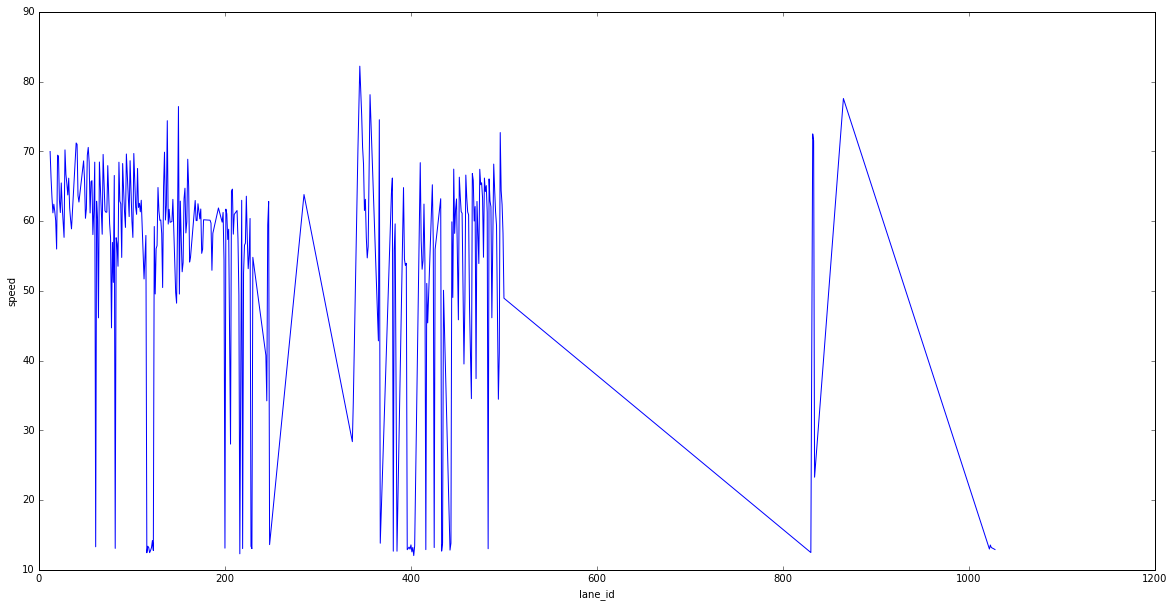

In [88]:
mean_speeds_by_lane = pd.DataFrame(group_flow_data.speed.mean()).reset_index()
# mean_speeds_by_lane

plt.figure(figsize=(20,10))
plt.plot(mean_speeds_by_lane['lane_id'], mean_speeds_by_lane['speed'])
#, align='center', alpha=2
plt.xlabel('lane_id')
plt.ylabel('speed')
# plt.yscale('log')

In [17]:
group_flow_data['lane_id'] == 12

False

In [73]:
def split_hour(row):
    val = str(row['measurement_start'])
    if "-" in val: 
        return val.split('T')[1].split(':')[0]

flow_data['hour'] = flow_data.apply(lambda row: split_hour(row), axis=1)
flow_data['flow'].describe()

count    1.141738e+07
mean     2.593519e+01
std      6.051154e+01
min     -5.200000e+01
25%      0.000000e+00
50%      9.000000e+00
75%      2.000000e+01
max      3.000000e+02
Name: flow, dtype: float64

In [97]:
grouped_by_hour = flow_data.groupby(['hour'])
mean_speeds_by_hour = pd.DataFrame(grouped_by_hour.speed.mean()).reset_index()
mean_speeds_by_hour

# plt.figure(figsize=(20,10))
plt.plot(mean_speeds_by_hour['hour'], mean_speeds_by_hour['speed'])
#, align='center', alpha=2
plt.xlabel('hour')
plt.ylabel('speed')
# plt.yscale('log')

KeyError: 'hour'

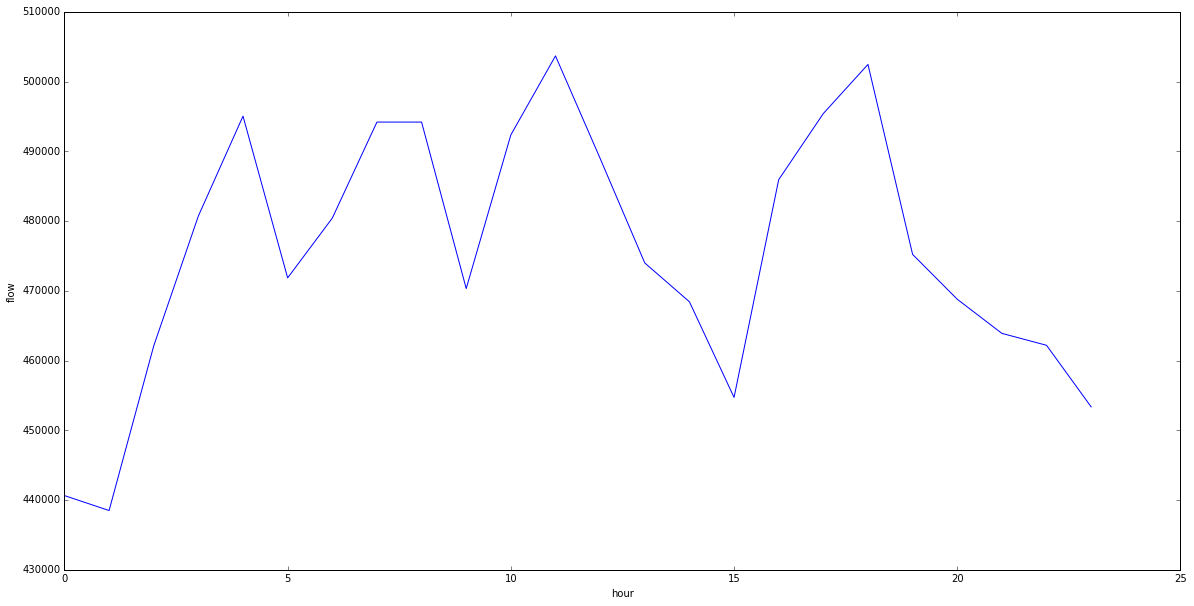

In [72]:
grouped_by_hour = flow_data.groupby(['hour'])
total_flow_by_hour = pd.DataFrame(grouped_by_hour.flow.count().reset_index())
# total_flow_by_hour

plt.figure(figsize=(20,10))
plt.plot(total_flow_by_hour['hour'], total_flow_by_hour['flow'])
#, align='center', alpha=2
plt.xlabel('hour')
plt.ylabel('flow')
# plt.yscale('log')

In [75]:
flow_data['speed'].describe()

count    1.141738e+07
mean     4.944662e+01
std      2.678681e+01
min     -6.600000e+01
25%      3.900000e+01
50%      6.100000e+01
75%      6.700000e+01
max      1.560000e+02
Name: speed, dtype: float64

In [89]:
joined_maps_speed = pd.merge(mean_speeds_by_lane, map_data, how='inner')

In [90]:
joined_maps_speed = joined_maps_speed.sort_values(['speed'])
joined_maps_speed.head()

,lane_id,speed,zone_id,lane_number,name,state,road,description,location_description,lane_type,organization,detector_type,latitude,longitude,bearing,default_speed,interval
224,403,12.050279,57907,3,Lane 3 WB Normal,Northern Virginia,I-66,West,IDS-66-W-62.7,Normal,VDOT_NOVA,RTMS,38.878800,-77.263100,NaN,55.0,60.0
170,216,12.308958,57879,4,Lane 4 EB Normal,Northern Virginia,I-66,East,IDS-66-E-62.4,Normal,VDOT_NOVA,RTMS,38.878600,-77.263100,NaN,55.0,60.0
93,116,12.456706,1339,1,Lane 1 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Fairfax Co. Pkwy @ MM 56.21,Normal,VDOT_NOVA,Single Loop,38.855620,-77.381693,NaN,55.0,60.0
96,119,12.471591,1142,4,Lane 4 EB Normal,Northern Virginia,I-66,East,I-66 NEAR Fairfax Co. Pkwy @ MM 56.21,Normal,VDOT_NOVA,Single Loop,38.855523,-77.381658,NaN,55.0,60.0
297,830,12.488604,1295,1,Lane 1 SB Normal (rtms),Northern Virginia,I-395,South,I-395 NEAR Duke St @ MM 1.97,Normal,VDOT_NOVA,RTMS,38.809879,-77.152214,NaN,55.0,60.0


In [92]:
import mplleaflet

plt.figure(figsize=(10,10))
plt.hold(True)
plt.plot(joined_maps_speed['longitude'], joined_maps_speed['latitude'], 'rs') # Draw red squares
mplleaflet.display()

In [94]:
total_flow_by_lane = pd.DataFrame(group_flow_data.flow.count().reset_index())
# total_flow_by_hour

# plt.plot(total_flow_by_lane['lane_id'], total_flow_by_lane['flow'])

In [95]:
joined_maps_flow = pd.merge(total_flow_by_lane, map_data, how='inner')
joined_maps_flow = joined_maps_flow.sort_values(['flow'])

In [96]:
import mplleaflet

plt.figure(figsize=(10,10))
plt.hold(True)
plt.plot(joined_maps_flow['longitude'], joined_maps_flow['latitude'], 'rs') # Draw red squares
mplleaflet.display()